In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## 基本的使用方法

In [2]:
# Series
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
# Dataframe date
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [74]:
# 將index設為 dates, columns設為ABCD, 內容用np.亂數產生值
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,0.938416,-0.880098,2.414988,-0.490421
2013-01-02,0.041667,-1.049504,0.495963,-0.641042
2013-01-03,-0.970653,0.749976,-0.553825,0.474241
2013-01-04,0.532031,-0.851080,0.183669,-0.140890
2013-01-05,-0.473050,0.322728,1.148339,1.399996
2013-01-06,-0.073925,-2.097333,-1.435091,-0.137493


In [14]:
df2 = pd.DataFrame({ 'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(5,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })

df2

,A,B,C,D,E,F
0,1.0,2013-01-02,5.0,3,test,foo
1,1.0,2013-01-02,5.0,3,train,foo
2,1.0,2013-01-02,5.0,3,test,foo
3,1.0,2013-01-02,5.0,3,train,foo


In [17]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [19]:
# df2.按TAB可以顯示commands

SyntaxError: invalid syntax (<ipython-input-19-e8d0e54abc86>, line 1)

## 觀察情況

In [20]:
df.head()

,A,B,C,D
2013-01-01,-0.640480,0.546450,-0.386390,-0.090170
2013-01-02,0.776824,0.988309,-0.286272,0.570757
2013-01-03,-1.105400,2.147529,-0.452007,-1.264843
2013-01-04,-0.511648,-0.383348,0.397097,0.807492
2013-01-05,-0.694943,1.130718,0.080634,-0.815757


In [22]:
df.tail(2)

,A,B,C,D
2013-01-05,-0.694943,1.130718,0.080634,-0.815757
2013-01-06,-0.559788,0.898078,-0.575031,-1.692463


In [23]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [24]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [25]:
#利用describe會顯示基本的運算
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.455906,0.887956,-0.203661,-0.414164
std,0.639777,0.823222,0.369199,1.008609
min,-1.105400,-0.383348,-0.575031,-1.692463
25%,-0.681327,0.634357,-0.435602,-1.152572
50%,-0.600134,0.943194,-0.336331,-0.452963
75%,-0.523683,1.095116,-0.011093,0.405525
max,0.776824,2.147529,0.397097,0.807492


In [26]:
#index and column對調位置
df.T

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,-0.64048,0.776824,-1.105400,-0.511648,-0.694943,-0.559788
B,0.54645,0.988309,2.147529,-0.383348,1.130718,0.898078
C,-0.38639,-0.286272,-0.452007,0.397097,0.080634,-0.575031
D,-0.09017,0.570757,-1.264843,0.807492,-0.815757,-1.692463


In [27]:
#排序
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.090170,-0.386390,0.546450,-0.640480
2013-01-02,0.570757,-0.286272,0.988309,0.776824
2013-01-03,-1.264843,-0.452007,2.147529,-1.105400
2013-01-04,0.807492,0.397097,-0.383348,-0.511648
2013-01-05,-0.815757,0.080634,1.130718,-0.694943
2013-01-06,-1.692463,-0.575031,0.898078,-0.559788


In [29]:
#排序
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2013-01-06,-0.559788,0.898078,-0.575031,-1.692463
2013-01-05,-0.694943,1.130718,0.080634,-0.815757
2013-01-04,-0.511648,-0.383348,0.397097,0.807492
2013-01-03,-1.105400,2.147529,-0.452007,-1.264843
2013-01-02,0.776824,0.988309,-0.286272,0.570757
2013-01-01,-0.640480,0.546450,-0.386390,-0.090170


In [30]:
#以B為主做排序，所以下面的順序，B 由小到大， 其他的也跟著排列
df.sort_values(by='B')

,A,B,C,D
2013-01-04,-0.511648,-0.383348,0.397097,0.807492
2013-01-01,-0.640480,0.546450,-0.386390,-0.090170
2013-01-06,-0.559788,0.898078,-0.575031,-1.692463
2013-01-02,0.776824,0.988309,-0.286272,0.570757
2013-01-05,-0.694943,1.130718,0.080634,-0.815757
2013-01-03,-1.105400,2.147529,-0.452007,-1.264843


## 選擇參數

In [32]:
df

,A,B,C,D
2013-01-01,-0.640480,0.546450,-0.386390,-0.090170
2013-01-02,0.776824,0.988309,-0.286272,0.570757
2013-01-03,-1.105400,2.147529,-0.452007,-1.264843
2013-01-04,-0.511648,-0.383348,0.397097,0.807492
2013-01-05,-0.694943,1.130718,0.080634,-0.815757
2013-01-06,-0.559788,0.898078,-0.575031,-1.692463


In [33]:
#選column
df['A']

2013-01-01   -0.640480
2013-01-02    0.776824
2013-01-03   -1.105400
2013-01-04   -0.511648
2013-01-05   -0.694943
2013-01-06   -0.559788
Freq: D, Name: A, dtype: float64

In [35]:
#選row
df[0:3]

,A,B,C,D
2013-01-01,-0.640480,0.546450,-0.386390,-0.090170
2013-01-02,0.776824,0.988309,-0.286272,0.570757
2013-01-03,-1.105400,2.147529,-0.452007,-1.264843


In [40]:
#選取特定row的值
df.loc[dates[0]]

A   -0.64048
B    0.54645
C   -0.38639
D   -0.09017
Name: 2013-01-01 00:00:00, dtype: float64

In [41]:
#選取多個columns的值
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.640480,0.546450
2013-01-02,0.776824,0.988309
2013-01-03,-1.105400,2.147529
2013-01-04,-0.511648,-0.383348
2013-01-05,-0.694943,1.130718
2013-01-06,-0.559788,0.898078


In [42]:
df.loc[dates[0],['A','B']]

A   -0.64048
B    0.54645
Name: 2013-01-01 00:00:00, dtype: float64

In [43]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.776824,0.988309
2013-01-03,-1.105400,2.147529
2013-01-04,-0.511648,-0.383348


In [44]:
df.loc['20130102',['A','B']]

A    0.776824
B    0.988309
Name: 2013-01-02 00:00:00, dtype: float64

In [45]:
#得到特定的值
df.loc[dates[0],'A']

-0.64047989015939699

In [46]:
df.at[dates[0],'A']

-0.64047989015939699

In [47]:
df

,A,B,C,D
2013-01-01,-0.640480,0.546450,-0.386390,-0.090170
2013-01-02,0.776824,0.988309,-0.286272,0.570757
2013-01-03,-1.105400,2.147529,-0.452007,-1.264843
2013-01-04,-0.511648,-0.383348,0.397097,0.807492
2013-01-05,-0.694943,1.130718,0.080634,-0.815757
2013-01-06,-0.559788,0.898078,-0.575031,-1.692463


In [51]:
#選擇指定的row值
df.iloc[3]

A   -0.511648
B   -0.383348
C    0.397097
D    0.807492
Name: 2013-01-04 00:00:00, dtype: float64

In [54]:
#選擇指定的row and col
df.iloc[3:5,0:2]

,A,B
2013-01-04,-0.511648,-0.383348
2013-01-05,-0.694943,1.130718


In [55]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.776824,-0.286272
2013-01-03,-1.105400,-0.452007
2013-01-05,-0.694943,0.080634


In [56]:
#指定row， 得到全部的col
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.776824,0.988309,-0.286272,0.570757
2013-01-03,-1.105400,2.147529,-0.452007,-1.264843


In [57]:
#取得特定的值
df.iloc[1,1]

0.98830932664985049

In [58]:
df.iat[1,1]

0.98830932664985049

## 判別

In [59]:
df

,A,B,C,D
2013-01-01,-0.640480,0.546450,-0.386390,-0.090170
2013-01-02,0.776824,0.988309,-0.286272,0.570757
2013-01-03,-1.105400,2.147529,-0.452007,-1.264843
2013-01-04,-0.511648,-0.383348,0.397097,0.807492
2013-01-05,-0.694943,1.130718,0.080634,-0.815757
2013-01-06,-0.559788,0.898078,-0.575031,-1.692463


In [60]:
df[df.A > 0]

,A,B,C,D
2013-01-02,0.776824,0.988309,-0.286272,0.570757


In [61]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.546450,NaN,NaN
2013-01-02,0.776824,0.988309,NaN,0.570757
2013-01-03,NaN,2.147529,NaN,NaN
2013-01-04,NaN,NaN,0.397097,0.807492
2013-01-05,NaN,1.130718,0.080634,NaN
2013-01-06,NaN,0.898078,NaN,NaN


In [62]:
#將df的數值都複製到df2
df2 = df.copy()
df2

,A,B,C,D
2013-01-01,-0.640480,0.546450,-0.386390,-0.090170
2013-01-02,0.776824,0.988309,-0.286272,0.570757
2013-01-03,-1.105400,2.147529,-0.452007,-1.264843
2013-01-04,-0.511648,-0.383348,0.397097,0.807492
2013-01-05,-0.694943,1.130718,0.080634,-0.815757
2013-01-06,-0.559788,0.898078,-0.575031,-1.692463


In [63]:
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-0.640480,0.546450,-0.386390,-0.090170,one
2013-01-02,0.776824,0.988309,-0.286272,0.570757,one
2013-01-03,-1.105400,2.147529,-0.452007,-1.264843,two
2013-01-04,-0.511648,-0.383348,0.397097,0.807492,three
2013-01-05,-0.694943,1.130718,0.080634,-0.815757,four
2013-01-06,-0.559788,0.898078,-0.575031,-1.692463,three


In [64]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,-1.105400,2.147529,-0.452007,-1.264843,two
2013-01-05,-0.694943,1.130718,0.080634,-0.815757,four


## 設定

In [66]:
df

,A,B,C,D
2013-01-01,-0.640480,0.546450,-0.386390,-0.090170
2013-01-02,0.776824,0.988309,-0.286272,0.570757
2013-01-03,-1.105400,2.147529,-0.452007,-1.264843
2013-01-04,-0.511648,-0.383348,0.397097,0.807492
2013-01-05,-0.694943,1.130718,0.080634,-0.815757
2013-01-06,-0.559788,0.898078,-0.575031,-1.692463


In [65]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [75]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,0.938416,-0.880098,2.414988,-0.490421,NaN
2013-01-02,0.041667,-1.049504,0.495963,-0.641042,1.0
2013-01-03,-0.970653,0.749976,-0.553825,0.474241,2.0
2013-01-04,0.532031,-0.851080,0.183669,-0.140890,3.0
2013-01-05,-0.473050,0.322728,1.148339,1.399996,4.0
2013-01-06,-0.073925,-2.097333,-1.435091,-0.137493,5.0


In [76]:
df.at[dates[0],'F'] = 0
df

,A,B,C,D,F
2013-01-01,0.938416,-0.880098,2.414988,-0.490421,0.0
2013-01-02,0.041667,-1.049504,0.495963,-0.641042,1.0
2013-01-03,-0.970653,0.749976,-0.553825,0.474241,2.0
2013-01-04,0.532031,-0.851080,0.183669,-0.140890,3.0
2013-01-05,-0.473050,0.322728,1.148339,1.399996,4.0
2013-01-06,-0.073925,-2.097333,-1.435091,-0.137493,5.0


In [77]:
#指定 row =0 , col =1 為0
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.938416,0.000000,2.414988,-0.490421,0.0
2013-01-02,0.041667,-1.049504,0.495963,-0.641042,1.0
2013-01-03,-0.970653,0.749976,-0.553825,0.474241,2.0
2013-01-04,0.532031,-0.851080,0.183669,-0.140890,3.0
2013-01-05,-0.473050,0.322728,1.148339,1.399996,4.0
2013-01-06,-0.073925,-2.097333,-1.435091,-0.137493,5.0


In [83]:
np.array([5] * len(df))

array([5, 5, 5, 5, 5, 5])

In [85]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.938416,0.000000,2.414988,5,0.0
2013-01-02,0.041667,-1.049504,0.495963,5,1.0
2013-01-03,-0.970653,0.749976,-0.553825,5,2.0
2013-01-04,0.532031,-0.851080,0.183669,5,3.0
2013-01-05,-0.473050,0.322728,1.148339,5,4.0
2013-01-06,-0.073925,-2.097333,-1.435091,5,5.0


In [87]:
#將大於0的數值，變成 負df2
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,-0.938416,0.000000,-2.414988,-5,0.0
2013-01-02,-0.041667,-1.049504,-0.495963,-5,-1.0
2013-01-03,-0.970653,-0.749976,-0.553825,-5,-2.0
2013-01-04,-0.532031,-0.851080,-0.183669,-5,-3.0
2013-01-05,-0.473050,-0.322728,-1.148339,-5,-4.0
2013-01-06,-0.073925,-2.097333,-1.435091,-5,-5.0


## 遺失值

In [88]:
#重新定義df1為 df index 0到4的日期， column 還要加上E
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

#設定 index為 0跟1 ， col = E的值為1
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.938416,0.000000,2.414988,5,0.0,1.0
2013-01-02,0.041667,-1.049504,0.495963,5,1.0,1.0
2013-01-03,-0.970653,0.749976,-0.553825,5,2.0,NaN
2013-01-04,0.532031,-0.851080,0.183669,5,3.0,NaN


In [93]:
#指定df2為df index 0到2， col 為 A跟C
df2 = df.reindex(index=dates[0:2], columns = ['A','C'])
df2

,A,C
2013-01-01,0.938416,2.414988
2013-01-02,0.041667,0.495963


In [94]:
#當row 的數值裡面有遺失值 NaN等， 將該row刪除
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-01,0.938416,0.000000,2.414988,5,0.0,1.0
2013-01-02,0.041667,-1.049504,0.495963,5,1.0,1.0


In [95]:
#將遺失值 填成 5
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.938416,0.000000,2.414988,5,0.0,1.0
2013-01-02,0.041667,-1.049504,0.495963,5,1.0,1.0
2013-01-03,-0.970653,0.749976,-0.553825,5,2.0,5.0
2013-01-04,0.532031,-0.851080,0.183669,5,3.0,5.0


In [96]:
# 找出是否有遺失值
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,False,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## 操作

In [97]:
df

,A,B,C,D,F
2013-01-01,0.938416,0.000000,2.414988,5,0.0
2013-01-02,0.041667,-1.049504,0.495963,5,1.0
2013-01-03,-0.970653,0.749976,-0.553825,5,2.0
2013-01-04,0.532031,-0.851080,0.183669,5,3.0
2013-01-05,-0.473050,0.322728,1.148339,5,4.0
2013-01-06,-0.073925,-2.097333,-1.435091,5,5.0


In [98]:
#mean 指的是平均數
#col的平均值
df.mean()

A   -0.000919
B   -0.487535
C    0.375674
D    5.000000
F    2.500000
dtype: float64

In [99]:
#row的平均值
df.mean(1)

2013-01-01    1.670681
2013-01-02    1.097625
2013-01-03    1.245100
2013-01-04    1.572924
2013-01-05    1.999603
2013-01-06    1.278730
Freq: D, dtype: float64

In [102]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates)
s

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [106]:
#往下移二位
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [109]:
df


,A,B,C,D,F
2013-01-01,0.938416,0.000000,2.414988,5,0.0
2013-01-02,0.041667,-1.049504,0.495963,5,1.0
2013-01-03,-0.970653,0.749976,-0.553825,5,2.0
2013-01-04,0.532031,-0.851080,0.183669,5,3.0
2013-01-05,-0.473050,0.322728,1.148339,5,4.0
2013-01-06,-0.073925,-2.097333,-1.435091,5,5.0


In [110]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.970653,-0.250024,-1.553825,4.0,1.0
2013-01-04,-2.467969,-3.851080,-2.816331,2.0,0.0
2013-01-05,-5.473050,-4.677272,-3.851661,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply  可以代入公式進去

In [112]:
df

,A,B,C,D,F
2013-01-01,0.938416,0.000000,2.414988,5,0.0
2013-01-02,0.041667,-1.049504,0.495963,5,1.0
2013-01-03,-0.970653,0.749976,-0.553825,5,2.0
2013-01-04,0.532031,-0.851080,0.183669,5,3.0
2013-01-05,-0.473050,0.322728,1.148339,5,4.0
2013-01-06,-0.073925,-2.097333,-1.435091,5,5.0


In [114]:
#把col的值 累加 ， A從上往下看，累加 就可以看出來了
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.938416,0.000000,2.414988,5,0.0
2013-01-02,0.980083,-1.049504,2.910952,10,1.0
2013-01-03,0.009430,-0.299528,2.357127,15,3.0
2013-01-04,0.541461,-1.150608,2.540796,20,6.0
2013-01-05,0.068411,-0.827879,3.689135,25,10.0
2013-01-06,-0.005514,-2.925213,2.254043,30,15.0


In [115]:
#np.cumsum累積
#第一個為1, 第二個為1+2 = 3 .....最後一個全部加起來 =21

a = np.array([[1,2,3], [4,5,6]])

np.cumsum(a)

array([ 1,  3,  6, 10, 15, 21])

In [118]:
df.apply(lambda x: x.max() - x.min())

A    1.909069
B    2.847309
C    3.850080
D    0.000000
F    5.000000
dtype: float64

## 計算數量

In [121]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    4
2    6
3    5
4    0
5    6
6    0
7    1
8    2
9    3
dtype: int64

In [122]:
s.value_counts()

6    2
2    2
0    2
5    1
4    1
3    1
1    1
dtype: int64

## 大小寫

In [124]:
#統一變成小寫
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

In [125]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.995685,-1.131712,1.365809,-0.756562
1,0.604831,-0.131571,-0.761680,0.407426
2,0.709521,-0.605474,0.010389,2.159846
3,-1.099362,0.453398,0.847311,0.221665
4,0.797036,-1.144021,-0.242584,1.422835
5,-0.008651,1.021913,0.502208,1.017755
6,0.306622,-0.727167,1.876817,-0.656688
7,1.258320,1.206331,0.054652,0.610882
8,-0.375769,0.929304,-0.707911,2.765699
9,0.393708,0.108111,1.592771,0.716836


In [126]:
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.995685 -1.131712  1.365809 -0.756562
 1  0.604831 -0.131571 -0.761680  0.407426
 2  0.709521 -0.605474  0.010389  2.159846,
           0         1         2         3
 3 -1.099362  0.453398  0.847311  0.221665
 4  0.797036 -1.144021 -0.242584  1.422835
 5 -0.008651  1.021913  0.502208  1.017755
 6  0.306622 -0.727167  1.876817 -0.656688,
           0         1         2         3
 7  1.258320  1.206331  0.054652  0.610882
 8 -0.375769  0.929304 -0.707911  2.765699
 9  0.393708  0.108111  1.592771  0.716836]

In [127]:
pd.concat(pieces)

,0,1,2,3
0,-0.995685,-1.131712,1.365809,-0.756562
1,0.604831,-0.131571,-0.761680,0.407426
2,0.709521,-0.605474,0.010389,2.159846
3,-1.099362,0.453398,0.847311,0.221665
4,0.797036,-1.144021,-0.242584,1.422835
5,-0.008651,1.021913,0.502208,1.017755
6,0.306622,-0.727167,1.876817,-0.656688
7,1.258320,1.206331,0.054652,0.610882
8,-0.375769,0.929304,-0.707911,2.765699
9,0.393708,0.108111,1.592771,0.716836


## Join

In [128]:
left = pd.DataFrame({'key': ['foo', 'foo'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,foo,2


In [129]:
right = pd.DataFrame({'key': ['foo', 'foo'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,foo,5


In [130]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [131]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
left

,key,lval
0,foo,1
1,bar,2


In [132]:
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
right

,key,rval
0,foo,4
1,bar,5


In [133]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Append

In [134]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A','B','C','D'])
df

,A,B,C,D
0,-0.185457,0.133585,2.091932,0.516129
1,-0.569219,-0.013705,-1.212353,0.018765
2,0.708835,0.184046,-0.793799,-1.735948
3,0.330745,-0.435420,-0.015991,0.286724
4,-1.307056,-0.116684,0.590798,0.656774
5,1.831675,-0.840034,-0.549301,0.151842
6,-0.092254,-0.545701,-0.288701,0.366734
7,0.301008,-0.641975,-0.581171,-0.316992


In [135]:
s = df.iloc[3]
s

A    0.330745
B   -0.435420
C   -0.015991
D    0.286724
Name: 3, dtype: float64

In [136]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.185457,0.133585,2.091932,0.516129
1,-0.569219,-0.013705,-1.212353,0.018765
2,0.708835,0.184046,-0.793799,-1.735948
3,0.330745,-0.435420,-0.015991,0.286724
4,-1.307056,-0.116684,0.590798,0.656774
5,1.831675,-0.840034,-0.549301,0.151842
6,-0.092254,-0.545701,-0.288701,0.366734
7,0.301008,-0.641975,-0.581171,-0.316992
8,0.330745,-0.435420,-0.015991,0.286724


## Group

In [138]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar','foo', 'bar', 'foo', 'foo'],
                    'B' : ['one', 'one', 'two', 'three','two', 'two', 'one', 'three'],
                    'C' : np.random.randn(8),
                    'D' : np.random.randn(8)})

df

,A,B,C,D
0,foo,one,0.395225,-0.632095
1,bar,one,-0.279790,-0.822314
2,foo,two,-0.369565,0.664288
3,bar,three,1.362476,-0.248119
4,foo,two,-0.601712,0.683524
5,bar,two,1.085264,-1.118197
6,foo,one,-0.679213,0.540018
7,foo,three,-0.419900,-0.206499


In [139]:
df.groupby('A').sum()

,C,D
A,,
bar,2.167950,-2.188630
foo,-1.675165,1.049236


In [140]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one   -0.279790 -0.822314
    three  1.362476 -0.248119
    two    1.085264 -1.118197
foo one   -0.283988 -0.092077
    three -0.419900 -0.206499
    two   -0.971277  1.347812

## Reshaping

In [141]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz','foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two','one', 'two', 'one', 'two']]))

tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [142]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
index

MultiIndex(levels=[['bar', 'baz', 'foo', 'qux'], ['one', 'two']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3], [0, 1, 0, 1, 0, 1, 0, 1]],
           names=['first', 'second'])

In [143]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df

A         B
first second                    
bar   one    -0.534886  0.005994
      two    -0.086844  0.012682
baz   one    -1.304395  2.248398
      two     0.987069  1.366281
foo   one    -0.392291 -1.751739
      two    -1.099920  0.248275
qux   one    -0.230288 -0.907692
      two     2.429035  0.299295

In [144]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.534886  0.005994
      two    -0.086844  0.012682
baz   one    -1.304395  2.248398
      two     0.987069  1.366281

In [145]:
#將原本的col, 變成row
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.534886
               B    0.005994
       two     A   -0.086844
               B    0.012682
baz    one     A   -1.304395
               B    2.248398
       two     A    0.987069
               B    1.366281
dtype: float64

In [146]:
stacked.unstack()

A         B
first second                    
bar   one    -0.534886  0.005994
      two    -0.086844  0.012682
baz   one    -1.304395  2.248398
      two     0.987069  1.366281

## Pivot Tables

In [147]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                    'B' : ['A', 'B', 'C'] * 4,
                    'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                    'D' : np.random.randn(12),
                    'E' : np.random.randn(12)})

df

,A,B,C,D,E
0,one,A,foo,0.091544,-0.038865
1,one,B,foo,-2.003547,0.517542
2,two,C,foo,-0.682832,-0.572490
3,three,A,bar,-0.537191,0.611525
4,one,B,bar,0.683608,-1.382806
5,one,C,bar,1.280630,-0.373851
6,two,A,foo,0.002732,0.289354
7,three,B,foo,1.453311,-0.221322
8,one,C,foo,-0.422021,1.811461
9,one,A,bar,-0.469747,-0.503557


In [148]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])


C             bar       foo
A     B                    
one   A -0.469747  0.091544
      B  0.683608 -2.003547
      C  1.280630 -0.422021
three A -0.537191       NaN
      B       NaN  1.453311
      C -0.183411       NaN
two   A       NaN  0.002732
      B -0.071905       NaN
      C       NaN -0.682832

## Time Series

In [149]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [151]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00     85
2012-01-01 00:00:01    458
2012-01-01 00:00:02    181
2012-01-01 00:00:03    151
2012-01-01 00:00:04     43
2012-01-01 00:00:05    199
2012-01-01 00:00:06    175
2012-01-01 00:00:07     67
2012-01-01 00:00:08    116
2012-01-01 00:00:09     79
2012-01-01 00:00:10    364
2012-01-01 00:00:11    454
2012-01-01 00:00:12    137
2012-01-01 00:00:13     67
2012-01-01 00:00:14    157
2012-01-01 00:00:15    429
2012-01-01 00:00:16    196
2012-01-01 00:00:17    406
2012-01-01 00:00:18    307
2012-01-01 00:00:19    100
2012-01-01 00:00:20    444
2012-01-01 00:00:21    171
2012-01-01 00:00:22    362
2012-01-01 00:00:23    391
2012-01-01 00:00:24    278
2012-01-01 00:00:25    379
2012-01-01 00:00:26    424
2012-01-01 00:00:27    361
2012-01-01 00:00:28    126
2012-01-01 00:00:29    358
                      ... 
2012-01-01 00:01:10    443
2012-01-01 00:01:11    143
2012-01-01 00:01:12     14
2012-01-01 00:01:13    179
2012-01-01 00:01:14    263
2012-01-01 00:01:15    191
2

In [152]:
#指定時間內的數值的總和
ts.resample('5Min').sum()

2012-01-01    22423
Freq: 5T, dtype: int64

In [153]:
#time zone
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts


2012-03-06    0.160322
2012-03-07    0.634783
2012-03-08    0.109757
2012-03-09   -1.323665
2012-03-10   -2.479246
Freq: D, dtype: float64

In [154]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.160322
2012-03-07 00:00:00+00:00    0.634783
2012-03-08 00:00:00+00:00    0.109757
2012-03-09 00:00:00+00:00   -1.323665
2012-03-10 00:00:00+00:00   -2.479246
Freq: D, dtype: float64

In [155]:
#轉換其他的timezone
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.160322
2012-03-06 19:00:00-05:00    0.634783
2012-03-07 19:00:00-05:00    0.109757
2012-03-08 19:00:00-05:00   -1.323665
2012-03-09 19:00:00-05:00   -2.479246
Freq: D, dtype: float64

In [156]:
#M是指月份
rng = pd.date_range('1/1/2012', periods=5, freq='M')
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [157]:
#月 + 日
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    0.717015
2012-02-29   -1.590795
2012-03-31   -0.450397
2012-04-30    0.118802
2012-05-31   -1.142019
Freq: M, dtype: float64

In [158]:
#月份
ps = ts.to_period()
ps

2012-01    0.717015
2012-02   -1.590795
2012-03   -0.450397
2012-04    0.118802
2012-05   -1.142019
Freq: M, dtype: float64

In [159]:
#月初
ps.to_timestamp()

2012-01-01    0.717015
2012-02-01   -1.590795
2012-03-01   -0.450397
2012-04-01    0.118802
2012-05-01   -1.142019
Freq: MS, dtype: float64

In [160]:
#幾季 , Q幾
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [163]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1    0.141971
1990Q2    0.752916
1990Q3    0.897038
1990Q4   -0.368486
1991Q1    0.523006
1991Q2   -1.023649
1991Q3   -0.038992
1991Q4    0.343052
1992Q1   -1.106873
1992Q2    0.052174
1992Q3    1.021178
1992Q4   -0.501249
1993Q1    0.308080
1993Q2    0.358095
1993Q3    0.838773
1993Q4   -0.809953
1994Q1    1.778787
1994Q2    0.740531
1994Q3   -1.447136
1994Q4    1.548194
1995Q1   -0.621732
1995Q2    0.408675
1995Q3   -0.086476
1995Q4   -0.045149
1996Q1    1.788195
1996Q2   -1.317703
1996Q3    0.799498
1996Q4    1.251388
1997Q1    1.522957
1997Q2   -0.115774
1997Q3   -1.181648
1997Q4   -0.270160
1998Q1   -0.420007
1998Q2   -0.208725
1998Q3    0.318655
1998Q4    0.295174
1999Q1   -0.095561
1999Q2   -0.141165
1999Q3    0.201697
1999Q4   -0.958975
2000Q1   -0.223415
2000Q2   -0.443424
2000Q3    1.312430
2000Q4   -0.440771
Freq: Q-NOV, dtype: float64

In [164]:
#加上 時 ： 分
ts.index = (prng.asfreq('M', 'e') + 1).asfreq('H', 's') + 9
ts

1990-03-01 09:00    0.141971
1990-06-01 09:00    0.752916
1990-09-01 09:00    0.897038
1990-12-01 09:00   -0.368486
1991-03-01 09:00    0.523006
1991-06-01 09:00   -1.023649
1991-09-01 09:00   -0.038992
1991-12-01 09:00    0.343052
1992-03-01 09:00   -1.106873
1992-06-01 09:00    0.052174
1992-09-01 09:00    1.021178
1992-12-01 09:00   -0.501249
1993-03-01 09:00    0.308080
1993-06-01 09:00    0.358095
1993-09-01 09:00    0.838773
1993-12-01 09:00   -0.809953
1994-03-01 09:00    1.778787
1994-06-01 09:00    0.740531
1994-09-01 09:00   -1.447136
1994-12-01 09:00    1.548194
1995-03-01 09:00   -0.621732
1995-06-01 09:00    0.408675
1995-09-01 09:00   -0.086476
1995-12-01 09:00   -0.045149
1996-03-01 09:00    1.788195
1996-06-01 09:00   -1.317703
1996-09-01 09:00    0.799498
1996-12-01 09:00    1.251388
1997-03-01 09:00    1.522957
1997-06-01 09:00   -0.115774
1997-09-01 09:00   -1.181648
1997-12-01 09:00   -0.270160
1998-03-01 09:00   -0.420007
1998-06-01 09:00   -0.208725
1998-09-01 09:

## Categoricals (分類 絕對)

In [165]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'a', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


In [166]:
df["grade"] = df["raw_grade"].astype("category")
df

,id,raw_grade,grade
0,1,a,a
1,2,b,b
2,3,b,b
3,4,a,a
4,5,a,a
5,6,e,e


In [167]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

In [169]:
df["grade"].cat.categories = ["very good", "good", "very bad"]
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


In [170]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [171]:
#排序
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [172]:
#數量
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

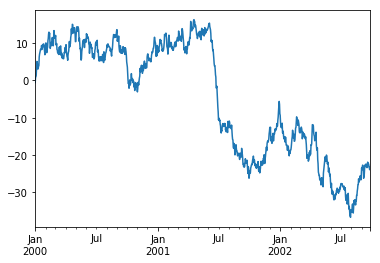

In [177]:
#畫圖
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

ts = ts.cumsum()

ts.plot()
plt.show()

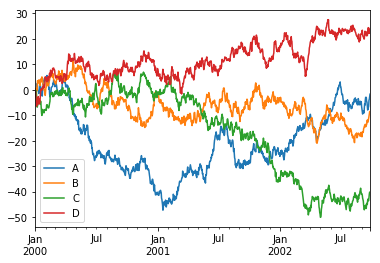

In [182]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')
plt.show()

## read file

In [183]:
# Write to csv
df.to_csv('foo.csv')
df.to_excel('foo.xlsx', sheet_name='Sheet1')

In [184]:
#read from csv
pd.read_csv('foo.csv')
pd.read_excel('foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])